In [25]:
print('Hello World!')

Hello World!


In [26]:
print("abc")

abc


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/jifengzhang/Desktop/地市级党委书记数据库.csv', encoding='gbk', engine='python')
print(data.head())

   省级政区代码 省级政区名称  地市级政区代码 地市级政区名称    年份 党委书记姓名  出生年份  出生月份  籍贯省份代码 籍贯省份名称  \
0  130000    河北省   130100    石家庄市  2000    陈来立   NaN   NaN     NaN    NaN   
1  130000    河北省   130100    石家庄市  2001    吴振华   NaN   NaN     NaN    NaN   
2  130000    河北省   130100    石家庄市  2002    吴振华   NaN   NaN     NaN    NaN   
3  130000    河北省   130100    石家庄市  2003    吴振华   NaN   NaN     NaN    NaN   
4  130000    河北省   130100    石家庄市  2004    吴振华   NaN   NaN     NaN    NaN   

   ...    民族  教育 是否是党校教育（是=1，否=0） 专业：人文 专业：社科  专业：理工  专业：农科  专业：医科  入党年份  工作年份  
0  ...   NaN  硕士              1.0   NaN   NaN    NaN    NaN    NaN   NaN   NaN  
1  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
2  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
3  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
4  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  

[5 rows x 23 columns]


In [34]:
print(data['党委书记姓名'])

0       陈来立
1       吴振华
2       吴振华
3       吴振华
4       吴振华
5       吴振华
6       吴振华
7       吴显国
8       吴显国
9        车俊
10      孙瑞彬
11      白润璋
12      白润璋
13      白润璋
14       张和
15       张和
16       张和
17       张和
18       赵勇
19       赵勇
20       赵勇
21       赵勇
22      王建忠
23      王建忠
24      王建忠
25      宋长瑞
26      宋长瑞
27      宋长瑞
28      宋长瑞
29      王三堂
       ... 
3633    NaN
3634    NaN
3635    NaN
3636    NaN
3637    NaN
3638    NaN
3639    NaN
3640    NaN
3641    NaN
3642    NaN
3643    NaN
3644    NaN
3645    NaN
3646    NaN
3647    NaN
3648    NaN
3649    NaN
3650    NaN
3651    NaN
3652    NaN
3653    NaN
3654    NaN
3655    NaN
3656    NaN
3657    NaN
3658    NaN
3659    NaN
3660    NaN
3661    NaN
3662    NaN
Name: 党委书记姓名, Length: 3663, dtype: object


In [2]:
print(data.columns.tolist())

['省级政区代码', '省级政区名称', '地市级政区代码', '地市级政区名称', '年份', '党委书记姓名', '出生年份', '出生月份', '籍贯省份代码', '籍贯省份名称', '籍贯地市代码', '籍贯地市名称', '性别', '民族', '教育', '是否是党校教育（是=1，否=0）', '专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科', '入党年份', '工作年份']


In [3]:
data_gender = data['性别']
# print(data_gender.head(10))
# data_gender_notnull = data_gender.notnull()
# data_gender_re = data_gender[data_gender.notnull()]
# type(data_gender_notnull)
# data_gender_notnull[130:140]
# type(data_gender)
data_gender = data_gender[data_gender.notnull()]
print(data_gender.head(10))
print('--------------')
print(data_gender.unique())

121    男
122    男
123    男
124    男
125    男
126    男
127    男
128    男
129    男
130    男
Name: 性别, dtype: object
--------------
['男' '女']


In [4]:
count = len(data_gender)
print('样本量：%d' % count)
count_man = len(data_gender[data_gender == '男'])
print('男性样本量：%d' % count_man)
count_women = len(data_gender[data_gender == '女'])
print('女性样本量：%d' % count_women)
rate_man = count_man / count
print('男性样本占比：' + str(rate_man*100)[:4] + '%')
rate_women = count_women / count
print('女性样本占比：' + str(rate_women*100)[:4] + '%')

样本量：2708
男性样本量：2633
女性样本量：75
男性样本占比：97.2%
女性样本占比：2.76%


In [6]:
data_gender2 = data[['省级政区名称','性别']]
data_gender2 = data_gender2[data_gender2['性别'].notnull()] #清洗数据，去掉null值
print(data_gender2.head())

print('-------------')

pt = pd.crosstab(data_gender2['省级政区名称'], data_gender2['性别'])
print(type(pt))
print(pt.head())
print('--------------')
pt['女性占比'] = pt['女'] / (pt['女'] + pt['男'])
print(pt.head())

print('------------')

pt = pt.sort_values(by = ['女性占比'], ascending=False)
print(pt.head())

    省级政区名称 性别
121    山西省  男
122    山西省  男
123    山西省  男
124    山西省  男
125    山西省  男
-------------
<class 'pandas.core.frame.DataFrame'>
性别       女    男
省级政区名称         
云南省      2   73
内蒙古自治区   0   86
吉林省      4   72
四川省      8  155
宁夏回族自治区  0   49
--------------
性别       女    男      女性占比
省级政区名称                   
云南省      2   73  0.026667
内蒙古自治区   0   86  0.000000
吉林省      4   72  0.052632
四川省      8  155  0.049080
宁夏回族自治区  0   49  0.000000
------------
性别       女    男      女性占比
省级政区名称                   
辽宁省     13  121  0.097015
陕西省      9   93  0.088235
吉林省      4   72  0.052632
山西省      6  112  0.050847
四川省      8  155  0.049080


Index(['辽宁省', '陕西省', '吉林省', '山西省', '四川省', '安徽省', '江西省', '山东省', '福建省', '云南省'], dtype='object', name='省级政区名称')


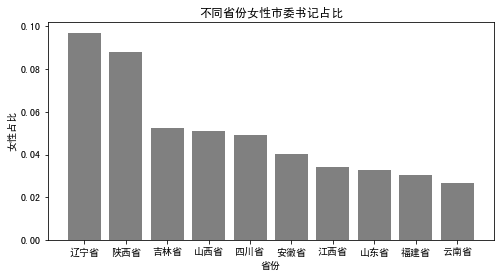

In [14]:
#绘制图表
fig_q1_1 = plt.figure(figsize = (8,4))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.title('不同省份女性市委书记占比')
index = pt.index[:10]
print(index)
plt.bar(range(10),
       pt['女性占比'][:10],
       tick_label=index,
       color='gray')
plt.xlabel('省份')
plt.ylabel('女性占比')
plt.show()


In [32]:
data_age = data[['出生年份','党委书记姓名','年份']]
# print(data_age.head(10))
data_age = data_age[data_age['出生年份'].notnull()]
print(data_age.head(10))
print(type(data_age))

print('\n')

df1 = 2017 - data_age['出生年份']
print(type(df1))
print('年龄：')
print(df1.head(10))

print('\n')

print('入职年份')
df_year_min = data_age[['年份', '党委书记姓名']].groupby(data_age['党委书记姓名']).min()
print(df_year_min.head(10))
df2 = df_year_min['年份'].groupby(df_year_min['年份']).count()
print('入职年份统计')
print(df2)

print('\n')
print('卸任年份')
df_year_max = data_age[['年份', '党委书记姓名']].groupby(data_age['党委书记姓名']).max()
print(df_year_max.head(10))
df3 = df_year_max['年份'].groupby(df_year_max['年份']).count()
print(df3)

       出生年份 党委书记姓名    年份
121  1945.0    侯伍杰  2000
122  1945.0    侯伍杰  2001
123  1950.0    云公民  2002
124  1950.0    云公民  2003
125  1950.0    云公民  2004
126  1950.0    云公民  2005
127  1956.0    申维辰  2006
128  1956.0    申维辰  2007
129  1956.0    申维辰  2008
130  1956.0    申维辰  2009
<class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.series.Series'>
年龄：
121    72.0
122    72.0
123    67.0
124    67.0
125    67.0
126    67.0
127    61.0
128    61.0
129    61.0
130    61.0
Name: 出生年份, dtype: float64


入职年份
          年份 党委书记姓名
党委书记姓名             
_沛钧     2008    _沛钧
丁海中     2003    丁海中
丁耀民     2000    丁耀民
丁解民     2001    丁解民
万庆良     2005    万庆良
丰立祥     2008    丰立祥
乔延春     2000    乔延春
于伟      2003     于伟
于伟国     2009    于伟国
于建成     2006    于建成
入职年份统计
年份
2000    190
2001     69
2002     65
2003     88
2004     51
2005     55
2006     50
2007     59
2008     99
2009     23
Name: 年份, dtype: int64


卸任年份
          年份 党委书记姓名
党委书记姓名             
_沛钧     2009    _沛钧
丁海中     2009    丁海中
丁耀民     200

In [85]:
data_major = data[['党委书记姓名','年份', '专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科']]
data_major = data_major[data_major['专业：人文'].notnull()]
print(data_major.head())

print('\n')

data_major['专业'] = data_major[['专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科']].idxmax(axis=1)
print(data_major.head())

print('\n')

data_major2 = data_major[['党委书记姓名','专业']].drop_duplicates()
print(data_major2.head())

print('\n')

df4 = data_major2['专业'].groupby(data_major2['专业']).count()
print(df4)

print('\n')

df5 = pd.crosstab(data_major['年份'], data_major['专业'])
print(df5.head(10))

df5['社科比例'] = df5['专业：社科'] / (df5['专业：理工'] + df5['专业：医科'] + df5['专业：社科'] + df5['专业：农科'] + df5['专业：人文'])
df5['人文比例'] = df5['专业：人文'] / (df5['专业：理工'] + df5['专业：医科'] + df5['专业：社科'] + df5['专业：农科'] + df5['专业：人文'])
df5['理工农医比例'] = (df5['专业：理工'] + df5['专业：农科'] + df5['专业：医科']) / (df5['专业：理工'] + df5['专业：医科'] + df5['专业：社科'] + df5['专业：农科'] + df5['专业：人文'])

print(df5.head())

  党委书记姓名    年份  专业：人文  专业：社科  专业：理工  专业：农科  专业：医科
1    吴振华  2001    0.0    0.0    1.0    0.0    0.0
2    吴振华  2002    0.0    0.0    1.0    0.0    0.0
3    吴振华  2003    0.0    0.0    1.0    0.0    0.0
4    吴振华  2004    0.0    0.0    1.0    0.0    0.0
5    吴振华  2005    0.0    0.0    1.0    0.0    0.0


  党委书记姓名    年份  专业：人文  专业：社科  专业：理工  专业：农科  专业：医科     专业
1    吴振华  2001    0.0    0.0    1.0    0.0    0.0  专业：理工
2    吴振华  2002    0.0    0.0    1.0    0.0    0.0  专业：理工
3    吴振华  2003    0.0    0.0    1.0    0.0    0.0  专业：理工
4    吴振华  2004    0.0    0.0    1.0    0.0    0.0  专业：理工
5    吴振华  2005    0.0    0.0    1.0    0.0    0.0  专业：理工


   党委书记姓名     专业
1     吴振华  专业：理工
7     吴显国  专业：社科
9      车俊  专业：社科
10    孙瑞彬  专业：社科
11    白润璋  专业：理工


专业
专业：人文    187
专业：农科     21
专业：医科      5
专业：理工    127
专业：社科    346
Name: 专业, dtype: int64


专业    专业：人文  专业：农科  专业：医科  专业：理工  专业：社科
年份                                     
2000     33      7      2     43     53
2001     42      6      3     36     

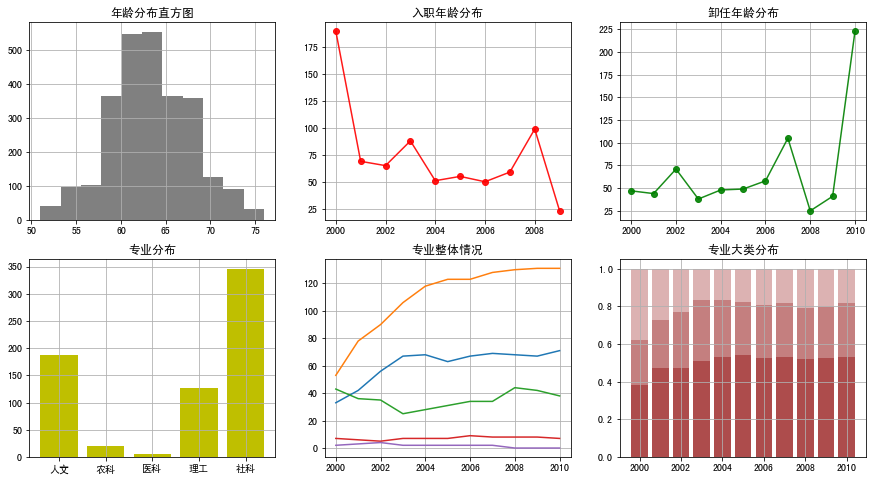

In [89]:
#绘制图表
fig_q2 = plt.figure(figsize= (15,8))

#创建2x3的表格矩阵
ax1 = fig_q2.add_subplot(2,3,1)
ax2 = fig_q2.add_subplot(2,3,2)
ax3 = fig_q2.add_subplot(2,3,3)
ax4 = fig_q2.add_subplot(2,3,4)
ax5 = fig_q2.add_subplot(2,3,5)
ax6 = fig_q2.add_subplot(2,3,6)

ax1.hist(df1, bins=11, color='gray', alpha=1)
ax1.set_title('年龄分布直方图')
ax1.grid(True)

ax2.plot(df2, color='r', marker='o', alpha = 0.9)
ax2.grid(True)
ax2.set_title('入职年龄分布')

ax3.plot(df3, color='g', marker='o', alpha = 0.9)
ax3.set_title('卸任年龄分布')
ax3.grid(True)

# print(len(df4))
ax4.bar(range(len(df4)), df4, color='y')
ax4.set_xticklabels(['','人文','农科','医科','理工','社科'])
ax4.set_title('专业分布')
ax4.grid(True)

ax5.plot(df5.index, df5[['专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科']])
ax5.grid(True)
ax5.set_title("专业整体情况")

ax6.bar(df5.index, df5['社科比例'], color='darkred', alpha=0.7)
ax6.bar(df5.index, df5['人文比例'], bottom=df5['社科比例'], color='darkred', alpha = 0.5)
ax6.bar(df5.index, df5['理工农医比例'], bottom=df5['人文比例']+df5['社科比例'], color='darkred', alpha = 0.3)
ax6.grid(True)
ax6.set_title('专业大类分布')

plt.show()